In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
ride_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Count number of rides in each city
ride_total = ride_data_complete.groupby(["city"]).count()["ride_id"]

# Find the average ride fare in each city
ride_fare_avg = ride_data_complete.groupby(["city"]).agg(
{
        "fare":"mean"
    
})["fare"]

# Determine the city type (Urban, Suburban, or Rural)
city_type = city_data.set_index(["city"])["type"]


# Determine the driver count for each city
driver_count = ride_data_complete.groupby(["city"]).agg(
{
        "driver_count":"mean"

})["driver_count"]

# Create a dataframe that displays the total number of rides, the average fare, the driver count, and the city type for each city
ride_summary_df = pd.DataFrame({
     "ride_total": ride_total,
     "ride_fare_avg": ride_fare_avg,
     "driver_count": driver_count,
     "city_type": city_type
})

# Create separate dataframes that display the same for each city type
urban_data = ride_summary_df.loc[ride_summary_df["city_type"] == "Urban"]
suburban_data = ride_summary_df.loc[ride_summary_df["city_type"] == "Suburban"]
rural_data = ride_summary_df.loc[ride_summary_df["city_type"] == "Rural"]


## Bubble Plot of Ride Sharing Data

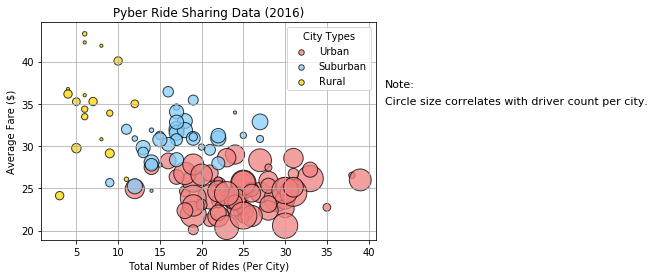

In [13]:
# Obtain the x and y coordinates for each of the three city types

x_urban = urban_data["ride_total"]
y_urban = urban_data["ride_fare_avg"]

x_suburban = suburban_data["ride_total"]
y_suburban = suburban_data["ride_fare_avg"]

x_rural = rural_data["ride_total"]
y_rural = rural_data["ride_fare_avg"]

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, marker="o", facecolors="lightcoral", edgecolors="black", linewidths = 1,
            s=urban_data["driver_count"]*10, alpha=0.75)
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", linewidths = 1,
            s=suburban_data["driver_count"]*10, alpha=0.75)
plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black", linewidths = 1,
            s=rural_data["driver_count"]*10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend

legend = plt.legend(("Urban", "Suburban", "Rural"),
                    title = "City Types")

# Make the circle sizes in the legend match
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 37, "Note:", fontsize=11)
plt.text(42, 35, "Circle size correlates with driver count per city.", fontsize=11)
#plt.text(75, 35, " ", fontsize=11)


# Save Figure
plt.savefig("./images/citytype_bubble.png")
plt.show()

## Total Fares by City Type

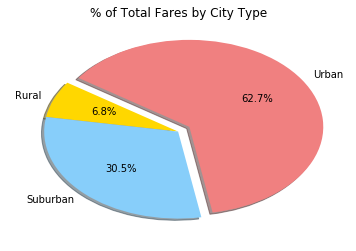

In [4]:
# Calculare the total fare for each city
fare_sum = ride_data_complete.groupby(["city"]).agg(
{
        "fare":"sum"

})["fare"]

# Create a dataframe that shows the total fare per city and the city type
fare_summary_df = pd.DataFrame({
     "fare_sum": fare_sum,
     "city_type": city_type
})

# Separate into dataframes bu city type
urban_fare = fare_summary_df.loc[fare_summary_df["city_type"] == "Urban"]
suburban_fare = fare_summary_df.loc[fare_summary_df["city_type"] == "Suburban"]
rural_fare = fare_summary_df.loc[fare_summary_df["city_type"] == "Rural"]

# Calculate the total fare for each city type
urban_fare_total = urban_fare["fare_sum"].sum()
suburban_fare_total = suburban_fare["fare_sum"].sum()
rural_fare_total = rural_fare["fare_sum"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_fare_total, rural_fare_total, suburban_fare_total]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./images/farepercent_pie.png")
plt.show()


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

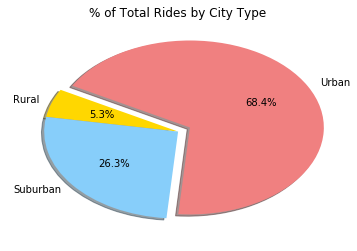

In [6]:
# Calculate the number of rides per city type
urban_ride_total = urban_data["ride_total"].sum()
suburban_ride_total = suburban_data["ride_total"].sum()
rural_ride_total = rural_data["ride_total"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_ride_total, rural_ride_total, suburban_ride_total]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=265)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("./images/ridepercent_pie.png")
plt.show()

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

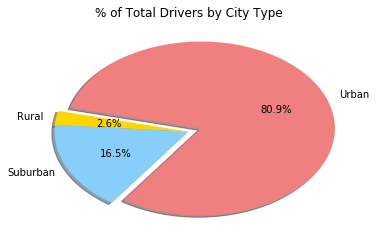

In [8]:
# Calculate the number of drivers per city type
urban_driver_total = urban_data["driver_count"].sum()
suburban_driver_total = suburban_data["driver_count"].sum()
rural_driver_total = rural_data["driver_count"].sum()

# Build Pie Charts
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_driver_total, rural_driver_total, suburban_driver_total]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=235)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("./images/driverpercent_pie.png")
plt.show()

In [9]:
# Show Figure
plt.show()